In [1]:
import pandas as pd
import seaborn as sns
import datetime
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
register_matplotlib_converters()
sns.set(style="whitegrid")

In [2]:
def save_to_pdf(filename, ax):
    fig = ax.get_figure()
    fig.savefig(filename, bbox_inches='tight')

In [3]:
df = pd.read_csv('/mnt/data/datasets/newspapers/daily-mail/c_articles.csv')

In [5]:
df.iloc[0]['article_url']

'http://www.dailymail.co.uk/sport/rugbyunion/article-3257063/Greig-Laidlaw-defends-Vern-Cotter-s-team-selection-ahead-South-Africa-clash.html'

In [4]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', ]
dates = df['article_url'].apply(lambda url: pd.Series([x for x in url.split('/') if x.isdigit() or x in months]))

In [5]:
df = df.join(dates, how='left')

In [6]:
df = df.rename(index=str, columns={0: "year", 1: "month", 2: 'day'})

In [7]:
months_dict = {'jan' : 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

In [11]:
df.describe()

,article_id
count,626395.000000
mean,313198.999998
std,180824.805274
min,1.000000
25%,156600.500000
50%,313199.000000
75%,469797.500000
max,626396.000000


In [14]:
df = df[['article_id', 'article_url', 'year', 'month', 'day']]

In [19]:
df.describe()

,article_id
count,626395.000000
mean,313198.999998
std,180824.805274
min,1.000000
25%,156600.500000
50%,313199.000000
75%,469797.500000
max,626396.000000


In [22]:
df = df.dropna()

In [25]:
timestamps = []

for index, row in df.iterrows():
    year = int(row['year'])
    if year == 200:
        year = 2008
    day = int(row['day'])
    month = months_dict[row['month']]
    timestamps.append(pd.Timestamp(datetime.datetime(year, month , day)))

In [29]:
df['timestamps'] = timestamps

In [35]:
df['year'] = df['year'].astype('int64')

In [38]:
df = df[df['year'] <= 2017]
df = df[df['year'] >= 2005]

In [44]:
count_df = df.groupby('timestamps')['article_id'].count()
count_df = count_df.reset_index()

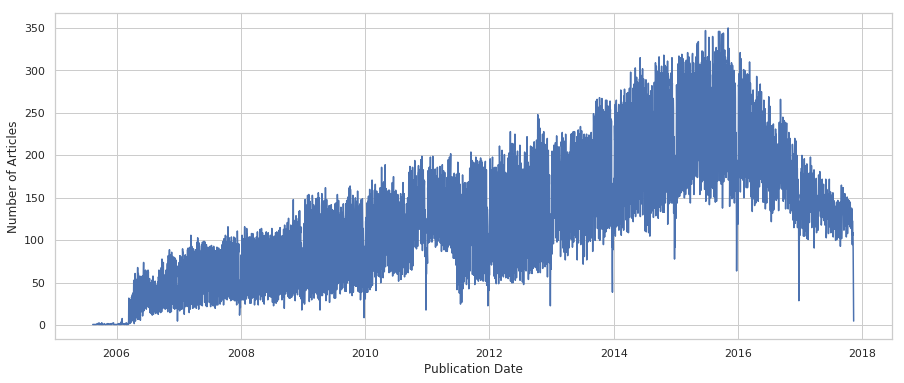

In [94]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x="timestamps", y="article_id", data=count_df)
ax.set(xlabel='Publication Date', ylabel='Number of Articles')
save_to_pdf('./plots/number_of_articles_per_day', ax)

In [43]:
count_df.reset_index().head(1)

,timestamps,article_id
0,2005-08-14,1


[Text(0, 0.5, 'Number of Articles'), Text(0.5, 0, 'Publication Date')]

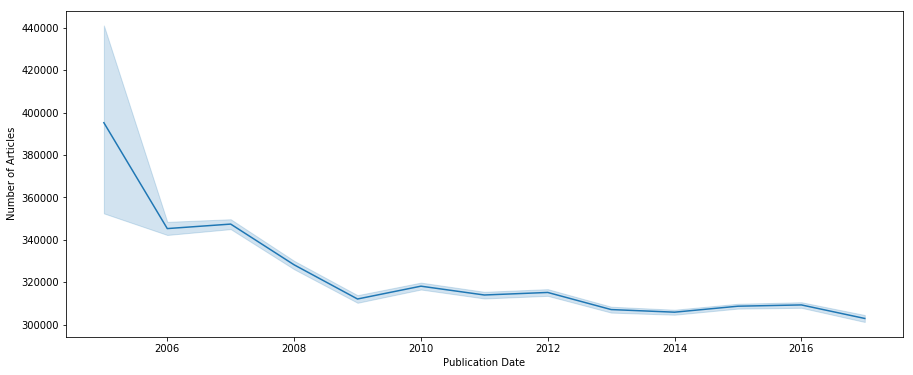

In [79]:
count_year_df = df.groupby('year')['article_id'].count().reset_index()

[Text(0, 0.5, 'Number of Articles'), Text(0.5, 0, 'Publication Date')]

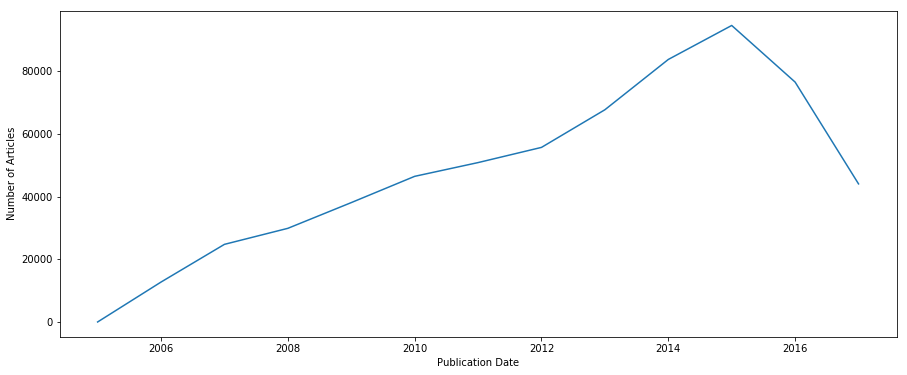

In [80]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x="year", y="article_id", data=count_year_df)
ax.set(xlabel='Publication Date', ylabel='Number of Articles')
save_to_pdf('./plots/number_of_articles_per_day', ax)